In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Análisis exploratorio

In [2]:
df = pd.read_csv("./Resources/creditcard.csv")
df.shape

(284807, 31)

Nuestro dataset contiene 284807 operaciones de tarjetas de crédito (cada línea es una operación) durante dos días distintos de septiembre de 2013 y 31 columnas o features.

Ahora vamos a echar un primer vistazo a los datos.

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


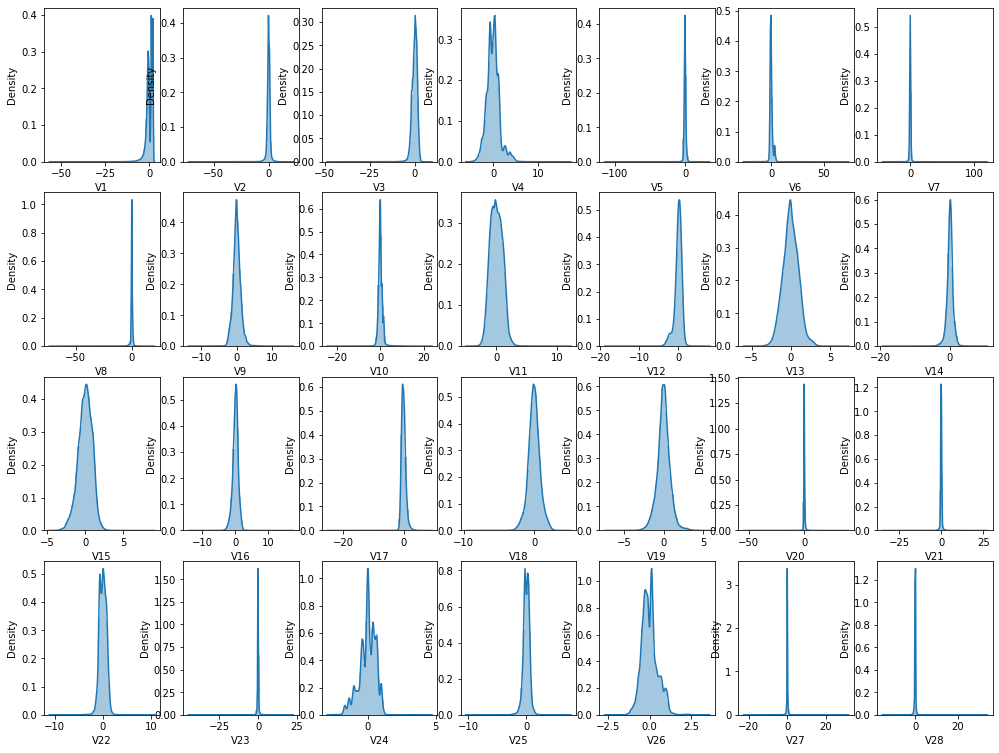

In [5]:
ncols = 7
nrows = 4
fig, axs = plt.subplots(nrows, ncols, figsize=(17,13))

count = 0
for col in df.columns:
    if 'V' in col:
        sns.distplot(df[str(col)], ax=axs[count//ncols, count%ncols])
        count += 1

Atendiendo primero a las features/columnas 'Vx', la media de los valores correspondientes a estas es muy próxima a 0, lo cual se oberva muy bien en los gráficos de la figura de arriba. Por otro lado, algo que llama la atención es que la desviación típica (std) de estas features disminuye a medida que el número x aumenta, desde 1.96 a 0.33 aproximadamente. Además, fijándonos en los valores máximos y mínimos de estas columnas y en los ejes X de los gráficos vemos como existen algunos valores atípicos.

Con esta información podemos decir que los valores de estas columnas 'Vx' parecen seguir una **distribución normal**, es decir, la mayor parte de los valores se concentran en torno a la media, en una región muy reducida ya que la desviación típica es muy baja.

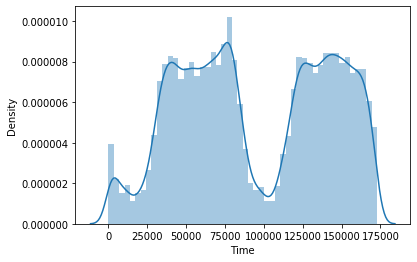

In [6]:
sns.distplot(df['Time'])

Viendo los valores de la columna 'Time' podríamos decir que se distribuyen aleatoriamente, aunque también es cierto que parecen agruparse en dos intervalos distintos que podrían corresponderse con las horas más activas de cada uno de los dos días.

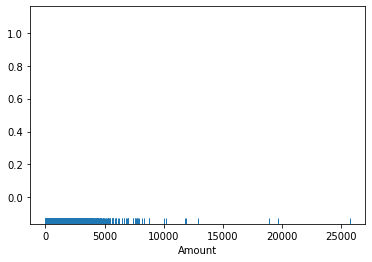

In [7]:
sns.rugplot(df['Amount'])

Si nos fijamos en la media (88.35) de los valores de la columna 'Amount', sus cuartiles: Q1 (5.6), Q2/mediana (22) y Q3 (77.17), y el gráfico de arriba, en el que cada raya marca un valor distinto, observamos que la mayoría de las operaciones de tarjetas de crédito se realizan con valores muy bajos, y que las operaciones con grandes 'amounts' (que las hay) representan menos del 25%.

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Centrándonos en la columna de la clase, vemos como sólo hay 2 valores (0 y 1) y como un 99.82% de los registros en el dataset se corresponden con la clase 0. Se trata entonces de un problema no balanceado, es decir, la clase 0 está sobrerepresentada en comparación con la clase 1.

Según esta información y suponiendo que las operaciones fraudulentas son las menos comunes, a partir de ahora vamos a considerar a la clase 1 como operación fraudulenta.

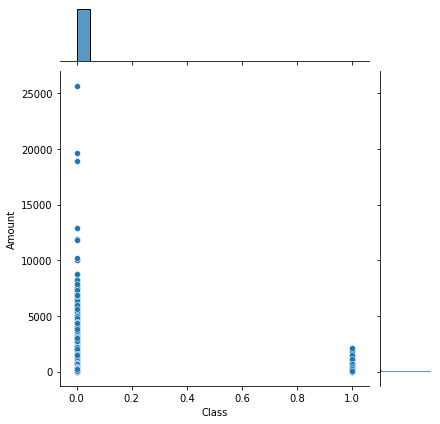

In [9]:
sns.jointplot(x='Class', y='Amount', data=df)

La figura de arriba compara el 'Amount' de las operaciones con la clase en busca de una relación directa entre ambas. A simple vista, de acuerdo con las operaciones de tarjetas de crédito en nuestro dataset, podemos observar como aquellas que operan con grandes cantidades ('Amount'), que recordemos son valores atípicos para esta columna, no están clasificadas como fraudulentas.

### Preparación de los datos

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Al buscar valores nulos no encontramos ninguno en el dataset.

In [33]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df_col):
    aux = df_col.to_numpy().reshape(-1,1)
    return RobustScaler().fit_transform(aux)

In [34]:
def z_score(df_col):
    return (df_col - df_col.mean()) / df_col.std()

In [35]:
def min_max_scaling(df_col):
    return (df_col - df_col.min()) / (df_col.max() - df_col.min())

In [36]:
# NOTE: ES POSIBLE QUE LA COLUMNA DEL TIEMPO NO SEA RELEVANTE

df_copy = df.drop(columns=['Time'])
df_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Cuando hay features/columnas cuyos valores son muy grandes comparados con otras, estos valores pueden alterar el comportamiento de algunos algoritmos de ML.

En este caso he pensado en estandarizar los valores de la columna 'Amount'. Sin embargo, los valores atípicos pueden afectar negativamente a la media y la desviación típica. Para superar esto voy a probar una técnica conocida como Robust Scaling que usa la mediana y el rango intercuartílico.

0.0 25691.16
88.34961925087359 250.1201092402221


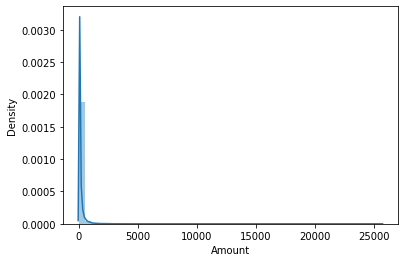

In [37]:
print(df['Amount'].min(), df['Amount'].max())
print(df['Amount'].mean(), df['Amount'].std())
sns.distplot(df['Amount'])

-0.30741284147278697 358.6831551736184
0.9271238629345306 3.4950060677738635


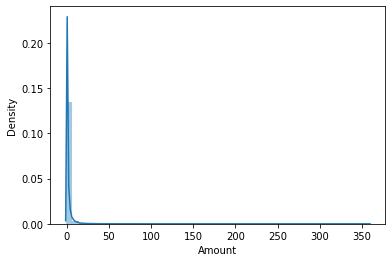

In [38]:
df_copy['Amount'] = robust_scaling(df_copy['Amount'])
print(df_copy['Amount'].min(), df_copy['Amount'].max())
print(df_copy['Amount'].mean(), df_copy['Amount'].std())
sns.distplot(df_copy['Amount'])

-28.798504351844418 1.2533492880193227
-2.369346569660883e-15 1.000000000000003


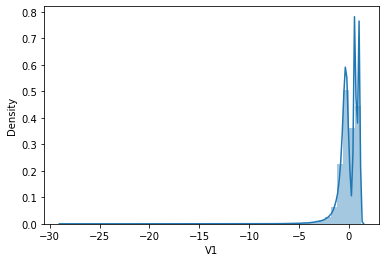

In [39]:
aux = z_score(df_copy['V1'])
print(aux.min(), aux.max())
print(aux.mean(), aux.std())
sns.distplot(aux)

0.0 1.0
0.9582937777137208 0.03327581759128156


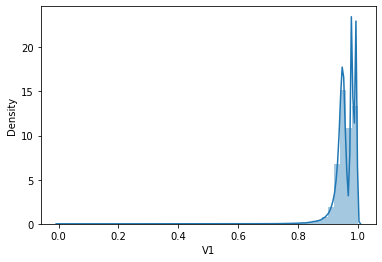

In [40]:
aux1 = min_max_scaling(df_copy['V1'])
print(aux1.min(), aux1.max())
print(aux1.mean(), aux1.std())
sns.distplot(aux1)

-25.234900685103014 1.0898053486906798
-0.008098692776059091 0.8759745782816649


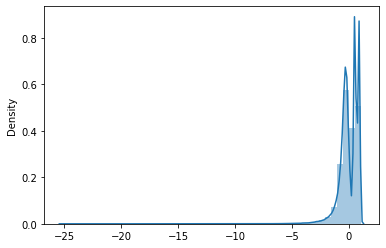

In [41]:
aux1_2 = robust_scaling(df_copy['V1'])
print(aux1_2.min(), aux1_2.max())
print(aux1_2.mean(), aux1_2.std())
sns.distplot(aux1_2)

0.0 1.0
0.2653555151992079 0.007536510514754847


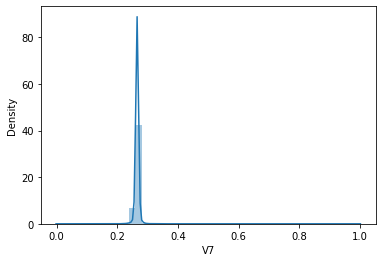

In [42]:
aux2 = min_max_scaling(df_copy['V7'])
print(aux2.min(), aux2.max())
print(aux2.mean(), aux2.std())
sns.distplot(aux2)

### Predicción

**TODO:** PROBAR CON/SIN LA VARIABLE DEL TIEMPO

**TODO:** PROBAR MANTENIENDO LAS Vx INTACTAS Y APLICANDO ROBUST SCALING AL 'Amount'

**TODO:** PROBAR APLICANDO Z-NORMALIZATION / MIN-MAX A TODAS LAS VARIABLES DE ENTRADA

- _Z-score_ no cambia mucho los valores debido a que estas variables ya siguen una distribución normal de media 0 y desviación típica cercana a 1. Lo mismo acurre con _Robust scaling_ , el único efecto de este método es reducir ligeramente los valores atípicos.
- _Min-max scaling_ parece desvirtuar los valores concentrándolos en el 0 o 1 según los valores atípicos sean positivos o negativos respectivamente.

**TODO:** BUSCAR AL MÉTODO PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES DE ENTRADA Y LA CLASE. AL IGUAL ES POSIBLE DESCARTAR ALGUNA.

**TODO:** APLICAR CROSS-VALIDATION (KFOLDS) SI USAMOS SCIKIT-LEARN

In [43]:
# Extraer la clase
target = df_copy.pop('Class')

Dividimos el dataset en tres conjuntos que mantengan la misma proporción de clases (*stratification*), utilizando un 70% del dataset original para entrenar el modelo y un 15% para los datos validación y evaluación respectivamente. 

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_aux, y_train, y_aux = train_test_split(df_copy, target, stratify=target, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_aux, y_aux, stratify=y_aux, test_size=0.5)

In [70]:
print(X_train.shape, y_train.shape)

(199364, 29) (199364,)


In [71]:
import tensorflow as tf
from tensorflow.keras import layers, losses

In [79]:
input_dim = X_train.shape[1]
print(input_dim)

def create_model():
    new_model = tf.keras.Sequential([
        layers.Dense(64, input_dim=input_dim, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")  # TODO: TRY WITH SOFTMAX TOO
    ])

    new_model.compile(
        loss=losses.BinaryCrossentropy(from_logits=True),  # Ya que se trata de un problema de clasificacion binario
        optimizer='adam',
        metrics='accuracy')#tf.metrics.BinaryAccuracy(threshold=0.5))

    return new_model

29


In [80]:
model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                1920      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 10,369
Trainable params: 10,369
Non-trainable params: 0
_________________________________________________________________


In [81]:
n_epochs = 5
history = model.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=n_epochs)

Epoch 1/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6936 - accuracy: 0.9982 - val_loss: 0.6932 - val_accuracy: 0.9983
Epoch 2/5
6231/6231 [==============================] - 9s 1ms/step - loss: 0.6931 - accuracy: 0.9983 - val_loss: 0.6932 - val_accuracy: 0.9983
Epoch 3/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - accuracy: 0.9983 - val_loss: 0.6932 - val_accuracy: 0.9983
Epoch 4/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - accuracy: 0.9983 - val_loss: 0.6932 - val_accuracy: 0.9983
Epoch 5/5
6231/6231 [==============================] - 7s 1ms/step - loss: 0.6931 - accuracy: 0.9983 - val_loss: 0.6932 - val_accuracy: 0.9983


In [82]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss, accuracy)

1336/1336 [==============================] - 1s 639us/step - loss: 0.6932 - accuracy: 0.9983
0.6931594610214233 0.9982678890228271


In [83]:
#train_ds = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values)).batch(32)
#test_ds = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values)).batch(32)
#val_ds = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values)).batch(32)

#history = model.fit(train_ds, validation_data=val_ds, epochs=n_epochs)

In [85]:
#model.predict(X_test.loc[_].to_numpy().reshape(1,-1))